# Spotify Data Exploration
#### Erick May, CPSC 222, Fall 2021

## Introduction
The data I'm examining for this exploration is my own Spotify streaming history. This jumped out to me as an interesting domain because I have long suspected that Spotify's shuffle feature is not very good, and plays certain songs much more than others. Now I have a chance to find out if this is really the case. All my Spotify data came to me in the JSON format, and includes one large table of data passively collected by Spotify as I listened. While the dataset has a lot of attributes, the most important ones are as follows:
* ts: The time, down to the second, when the song began playing (in UTC)
* master_metadata_track_name: The name of the song
* master_metadata_album_artist_name: The name of the lead artist
* master_metadata_album_album_name: The name of the album
* shuffle: True/false whether or shuffle mode was on when the song was played  

For this exploration, I will be choosing to focus on the one playlist I overwhelmingly listen to most often, for which I have created a CSV file containing two attributes:
* master_metadata_track_name: The song name (exactly as it appears in Spotify)
* inPlaylist: 1 if it's in the playlist, 0 if not (will be 1 for every row in the CSV, purpose of this will become clearer in next section)
  
I will have the machine learning algorithms attempt to classify, based simply on how many times a song was played, whether or not it's in the playlist. In theory, since 90% or more of my Spotify listening is to this playlist, the most played songs should all be from the playlist, while the least played songs should be from the rare occasion I listen to different things. If the classifier struggles with this, it may be evidence that the Spotify shuffle is favoring some songs much more than others, and that some of the least played songs are actually in the playlist, despite me listening to it all the time. If the results show that Spotify shuffle is pretty bad, the potential impact is that I could switch to another streaming service. If someone else in this class investigated the shuffle feature of their streaming service and found it to be better than Spotify's, maybe I'll switch to that one. I think the streaming-service-using public would be interested in the results to see just how random the shuffle is. Spotify would not necessarily be interested in the results, because they should hopefully know how their own shuffle works and be able to predict those results, but they should be interested in public opinions on whether these results are bad or not.

In [15]:
import pandas as pd
import importlib
import utils
importlib.reload(utils)

songs_df = pd.read_json("endsong.json")

songs_df = utils.clean_data(songs_df)

unique_songs_df = utils.create_value_counts_table(songs_df)

playlist_df = pd.read_csv("playlist.csv")

tracks_df = utils.outer_join(unique_songs_df, playlist_df)

c:\Users\erick\Documents\CPSC 222\Final Project\utils.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  songs_df["ts"] = songs_df["ts"].astype(str)


## Data Analysis
First, the data needed to be cleaned up a bit. The first and most obvious thing to do was to discard any rows where shuffle mode was off, as we are examining the shuffle feature here. Second, since I did not create the playlist I'm focusing on here until ~April 2020, any data from before then will be thrown out. Next, I will create a table of the value counts for the songs (number of times each song plays). I will merge this with a table originating from a CSV file I constructed by hand, which simply includes the title of every song in my playlist (exactly as it appears on Spotify) in addition to a second attribute which simply has the value 1 for every row (indicating that it is in the playlist). Then we will perform an outer join, so that songs not in the playlist will be assigned a null value, and then we'll fill that null value with 0 (indicating they are not in the playlist).

I will plot my ten most listened to artists here.

Text(0.5, 1.0, 'My Top 10 Artists')

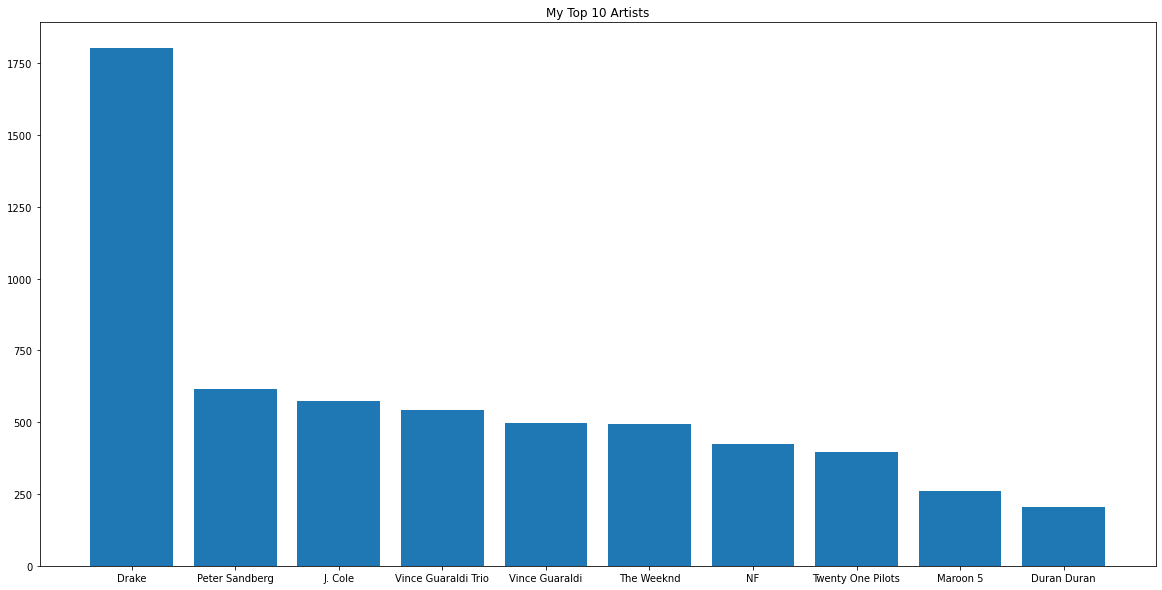

In [14]:
artists = [(songs_df["master_metadata_album_artist_name"].value_counts()).index.values[0], (songs_df["master_metadata_album_artist_name"].value_counts()).index.values[1], (songs_df["master_metadata_album_artist_name"].value_counts()).index.values[2], (songs_df["master_metadata_album_artist_name"].value_counts()).index.values[3], (songs_df["master_metadata_album_artist_name"].value_counts()).index.values[4], (songs_df["master_metadata_album_artist_name"].value_counts()).index.values[5], (songs_df["master_metadata_album_artist_name"].value_counts()).index.values[6], (songs_df["master_metadata_album_artist_name"].value_counts()).index.values[7], (songs_df["master_metadata_album_artist_name"].value_counts()).index.values[8], (songs_df["master_metadata_album_artist_name"].value_counts()).index.values[9]]
num_songs = [(songs_df["master_metadata_album_artist_name"].value_counts())[0], (songs_df["master_metadata_album_artist_name"].value_counts())[1], (songs_df["master_metadata_album_artist_name"].value_counts())[2], (songs_df["master_metadata_album_artist_name"].value_counts())[3], (songs_df["master_metadata_album_artist_name"].value_counts())[4], (songs_df["master_metadata_album_artist_name"].value_counts())[5], (songs_df["master_metadata_album_artist_name"].value_counts())[6], (songs_df["master_metadata_album_artist_name"].value_counts())[7], (songs_df["master_metadata_album_artist_name"].value_counts())[8], (songs_df["master_metadata_album_artist_name"].value_counts())[9]]
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
plt.bar(artists, num_songs)
plt.title("My Top 10 Artists")

So Drake is the clear winner here.

### Hypothesis Testing
Let's test the hypothesis that the mean number of songs I've listened to from an artist is less than 10 at a 0.05 level of significance (t = 1.645)

In [16]:
import scipy.stats as stats
t, p = stats.ttest_1samp(songs_df["master_metadata_album_artist_name"].value_counts(), 10)
print(t, p/2)

1.1131619399328057 0.1329030458114994


Since t-computed is < 1.645, we fail to reject the null, and conclude that the mean number of songs I hear from an artist (among those I've listened to at least once) is likely 10.